In [1]:
 import pandas as pd

In [2]:
df = pd.read_csv('/home/mds-student/Documents/aDITYA/multimodal-speech-emotion-recognition-master/Preprocessing/pickle_to_subset/pickle_to_subset_1.csv')

In [3]:
df = df.sample(frac=1).reset_index(drop = True)

In [4]:
df = df.sort_values(by = ['emotion'])

In [5]:
N = df['emotion'].eq('hap').sum()
df = df.sort_values('emotion').groupby('emotion').head(N)

In [6]:
df1 = pd.read_csv('/home/mds-student/Documents/aDITYA/multimodal-speech-emotion-recognition-master/Preprocessing/pickle_to_subset/pickle_to_subset_2.csv')

In [7]:
df1 = df1.sample(frac=1).reset_index(drop = True)

In [8]:
df1 = df1.sort_values(by = ['emotion'])

In [9]:
N = df1['emotion'].eq('hap').sum()
df1 = df1.sort_values('emotion').groupby('emotion').head(N)

In [10]:
df2 = pd.read_csv('/home/mds-student/Documents/aDITYA/multimodal-speech-emotion-recognition-master/Preprocessing/pickle_to_subset/pickle_to_subset_3.csv')

In [11]:
df2 = df2.sample(frac=1).reset_index(drop = True)

In [12]:
df2 = df2.sort_values(by = ['emotion'])

In [13]:
N = df2['emotion'].eq('hap').sum()
df2 = df2.sort_values('emotion').groupby('emotion').head(N)

In [14]:
df3 = pd.read_csv('/home/mds-student/Documents/aDITYA/multimodal-speech-emotion-recognition-master/Preprocessing/pickle_to_subset/pickle_to_subset_4.csv')

In [15]:
df3 = df3.sample(frac=1).reset_index(drop = True)

In [16]:
df3 = df3.sort_values(by = ['emotion'])

In [17]:
N = df3['emotion'].eq('hap').sum()
df3 = df3.sort_values('emotion').groupby('emotion').head(N)

In [18]:
df4 = pd.read_csv('/home/mds-student/Documents/aDITYA/multimodal-speech-emotion-recognition-master/Preprocessing/pickle_to_subset/pickle_to_subset_5.csv')

In [19]:
df4 = df4.sample(frac=1).reset_index(drop = True)

In [20]:
df4 = df4.sort_values(by = ['emotion'])

In [21]:
N = df4['emotion'].eq('hap').sum()
df4 = df4.sort_values('emotion').groupby('emotion').head(N)

In [22]:
final_df = pd.concat([df,df1,df2,df3,df4], ignore_index=True)

In [23]:
final_df.shape

(2380, 3)

In [25]:
final_df.emotion.value_counts()

ang    595
hap    595
neu    595
sad    595
Name: emotion, dtype: int64

In [26]:
final_df.to_csv('final_df.csv')

In [14]:
#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [1]:
import pandas as pd
from sklearn import model_selection

In [6]:
df = pd.read_csv('final_df_stra_fold.csv',low_memory=True)

In [96]:
import librosa
import ast
import numpy as np
import tqdm
from tqdm import tqdm


In [97]:
X_train, X_test, y_train, y_test = train_test_split(df, df.emotion, test_size = 0.20, shuffle = True, random_state = 42)

In [98]:
X_train_features = pd.DataFrame(columns = ['features'])
counter = 0
sample_rate = 44100
sample_rate = np.array(sample_rate)
for index,audio_vector in tqdm(enumerate(X_train.audio_vector)):
    res = ast.literal_eval(audio_vector)
    res = np.asarray(res)
    res = res.astype('float32')
    S = librosa.feature.melspectrogram(y = res, sr = sample_rate, n_mels=256,hop_length=128,fmax=8000)
    S_2 = np.mean(librosa.power_to_db(S, ref=np.max),axis = 0)
    X_train_features.loc[counter] = [S_2]
    counter = counter+1
X_train_features = (pd.DataFrame(X_train_features['features']. values.tolist())).fillna(0)

1904it [32:46,  1.03s/it]


In [99]:
X_test_features = pd.DataFrame(columns = ['features'])
counter = 0
sample_rate = 44100
sample_rate = np.array(sample_rate)
for index,audio_vector in tqdm(enumerate(X_test.audio_vector)):
    res = ast.literal_eval(audio_vector)
    res = np.asarray(res)
    res = res.astype('float32')
    S = librosa.feature.melspectrogram(y = res, sr = sample_rate, n_mels=256,hop_length=128,fmax=8000)
    S_2 = np.mean(librosa.power_to_db(S, ref=np.max),axis = 0)
    X_test_features.loc[counter] = [S_2]
    counter = counter+1
X_test_features = (pd.DataFrame(X_test_features['features']. values.tolist())).fillna(0)

476it [07:46,  1.02it/s]


In [100]:
mean = np.mean(X_train_features, axis=0)
std = np.std(X_train_features, axis=0)

X_train_features = ((X_train_features - mean)/std).fillna(0)

X_test_features = ((X_test_features - mean)/std).fillna(0)

In [101]:
X_train = np.array(X_train_features)
y_train = np.array(y_train)
X_test = np.array(X_test_features)
y_test = np.array(y_test)

In [102]:
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [103]:
#FOR CREATING MODEL IMPORT LIBS
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [104]:
import pickle

#pickle lb object for future use
filename = 'labels'
outfile = open(filename, 'wb')
pickle.dump(lb,outfile)
outfile.close()

X_train = np.expand_dims(X_train, axis = 2)
X_test = np.expand_dims(X_test, axis = 2)

In [111]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 10994, 256)        2304      
_________________________________________________________________
activation_12 (Activation)   (None, 10994, 256)        0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 10994, 256)        524544    
_________________________________________________________________
batch_normalization_4 (Batch (None, 10994, 256)        1024      
_________________________________________________________________
activation_13 (Activation)   (None, 10994, 256)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10994, 256)        0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1374, 256)        

In [112]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
119/119 [==============================] - 809s 7s/step - loss: 1.4056 - accuracy: 0.3167 - val_loss: 1.3867 - val_accuracy: 0.2584
Epoch 2/100
119/119 [==============================] - 788s 7s/step - loss: 1.3197 - accuracy: 0.3718 - val_loss: 1.3832 - val_accuracy: 0.3172
Epoch 3/100
119/119 [==============================] - 788s 7s/step - loss: 1.2783 - accuracy: 0.4228 - val_loss: 1.3696 - val_accuracy: 0.3487
Epoch 4/100
119/119 [==============================] - 788s 7s/step - loss: 1.2488 - accuracy: 0.4343 - val_loss: 1.3596 - val_accuracy: 0.3487
Epoch 5/100
119/119 [==============================] - 787s 7s/step - loss: 1.2181 - accuracy: 0.4548 - val_loss: 1.3424 - val_accuracy: 0.3445
Epoch 6/100
119/119 [==============================] - 788s 7s/step - loss: 1.1911 - accuracy: 0.4790 - val_loss: 1.3231 - val_accuracy: 0.3655
Epoch 7/100
119/119 [==============================] - 787s 7s/step - loss: 1.1753 - accuracy: 0.4895 - val_loss: 1.3070 - val_accuracy:

119/119 [==============================] - 787s 7s/step - loss: 0.8403 - accuracy: 0.6492 - val_loss: 1.1897 - val_accuracy: 0.4664
Epoch 58/100
119/119 [==============================] - 787s 7s/step - loss: 0.8201 - accuracy: 0.6696 - val_loss: 1.1835 - val_accuracy: 0.4727
Epoch 59/100
119/119 [==============================] - 787s 7s/step - loss: 0.8218 - accuracy: 0.6597 - val_loss: 1.1911 - val_accuracy: 0.4622
Epoch 60/100
119/119 [==============================] - 787s 7s/step - loss: 0.8301 - accuracy: 0.6539 - val_loss: 1.1998 - val_accuracy: 0.4538
Epoch 61/100
119/119 [==============================] - 788s 7s/step - loss: 0.8304 - accuracy: 0.6481 - val_loss: 1.2077 - val_accuracy: 0.4454
Epoch 62/100
119/119 [==============================] - 787s 7s/step - loss: 0.8198 - accuracy: 0.6544 - val_loss: 1.2080 - val_accuracy: 0.4601
Epoch 63/100
119/119 [==============================] - 787s 7s/step - loss: 0.8113 - accuracy: 0.6665 - val_loss: 1.1920 - val_accuracy: 0.455

In [114]:
import matplotlib.pyplot as plt

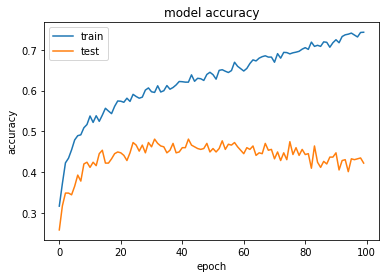

In [115]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

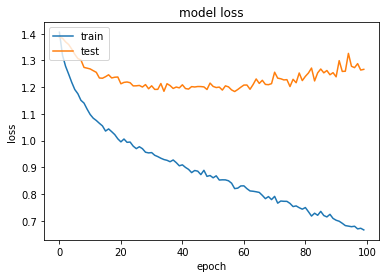

In [116]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()